# Game Theory and Preferential Voting System implemented with Python

Josep Monclús Carrasco

## Modules and Functions

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import igraph
import cvxpy as cp
import random
import csv
from Voting_System_GT import VotingSystemGT

In [8]:
# Google Form CSV to Text         
def prepare_text_file(csv_file,text_file_name):
    """
    This function converts the csv file into a text file where each line is a ballot
    Assuming that the csv file comes with the format of a google forms as in the template presentated.
    text_file_name is going to be the name for the text file necessary.
    """
    import csv
    # opening the CSV file
    with open(csv_file, mode ='r') as file:
        with open(text_file_name, 'w') as f:
            file = csv.reader(file)
            for i,lines in enumerate(file):
                #We quit the first column that we do not want
                if i == 0:
                    options = lines[1:]
                else:
                    ballot = [None]*len(options)
                    for j,opt in enumerate(lines[1:]):
                        ballot[int(opt)-1] = options[j]
                    f.write(",".join(ballot)+"\n")

    return

## Voting System Example Scenarios

### Scenario 1 Condocret Looser + General Tie

In this example we are going to see an example where there is one option that no one preferes and 3 more that are in general-tie so we need to breack the tie

In [5]:
#We create the Voting System Structure with the data provided
vs = VotingSystemGT("examples/voters2.txt")
#We compute the metrics
vs.compute_vt_metrics()
#We print the election description
vs.election_description()

Total voters: 20
4 Voters prefers option A than option B
20 Voters prefers option A than option D
8 Voters prefers option B than option C
20 Voters prefers option B than option D
4 Voters prefers option C than option A
20 Voters prefers option C than option D
Candidates: ['A', 'B', 'C', 'D']
Probability for each candidate: [0.5, 0.25, 0.25, -0.0]
Winner: ['A']


Edges [(0, 1), (0, 3), (1, 2), (1, 3), (2, 0), (2, 3)]
Weights [4, 20, 8, 20, 4, 20]


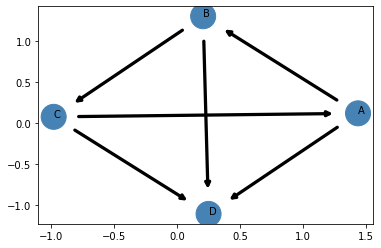

In [11]:
#We can see the graphical representation
vs.construct_graph()
vs.plot_graph()

In [10]:
#We select one winner
vs.select_winner_option() 

Candidates: ['A', 'B', 'C', 'D']
Probability for each candidate: [0.5, 0.25, 0.25, -0.0]
Winner: ['A']


As we can see A has 0.5 probability of been selected and B,C 0.25 but D, the option not prefered by anyone has 0 probability

### Scenario 2 Condocret Winner

In this scenario there is an Option that is clearly a Condocret Winner. It comes in google csv format so first needs to be converted to a .txt file

In [14]:
prepare_text_file("examples/scenario2.csv","examples/scenario2.txt")
vs2 = VotingSystemGT("examples/scenario2.txt")
vs2.compute_vt_metrics()
vs2.election_description()

Total voters: 11
1 Voters prefers option Option 1 than option Option 2
3 Voters prefers option Option 1 than option Option 3
9 Voters prefers option Option 1 than option Option 4
3 Voters prefers option Option 2 than option Option 3
9 Voters prefers option Option 2 than option Option 4
7 Voters prefers option Option 3 than option Option 4


Edges [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
Weights [1, 3, 9, 3, 9, 7]


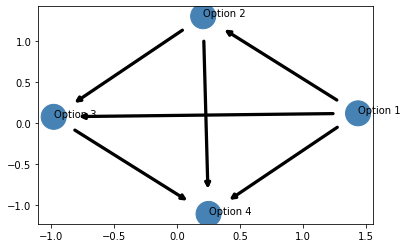

In [3]:
vs2.construct_graph()
vs2.plot_graph()

We can see that there is no arrow pointing to Option 1

In [15]:
vs2.select_winner_option()

Candidates: ['Option 1', 'Option 2', 'Option 3', 'Option 4']
Probability for each candidate: [1.0, 0.0, 0.0, -0.0]
Winner: ['Option 1']
